In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor


In [13]:
file_path1 = r"C:\Users\ilsed\OneDrive\Documents\EPA\Jaar 2\DTU\machine learning for energy systems\Windpark data.csv"
file_path2 = r"C:\Users\ilsed\OneDrive\Documents\EPA\Jaar 2\DTU\machine learning for energy systems\Data assignment 1\Weather data.csv"

# # Load the CSV file into a pandas DataFrame
Bornholm = pd.read_csv(file_path1)
Weather = pd.read_csv(file_path2)
# Bornholm = pd.read_csv('Data assignment 1/Windpark data.csv', delimiter=',')
# Weather = pd.read_csv('Data assignment 1/Weather data.csv', delimiter =',')


In [14]:
Bornholm

,datetime,AKI Kalby Active Power
0,2022-01-01 00:00:00,-1893.541825
1,2022-01-01 01:00:00,-1671.836030
2,2022-01-01 02:00:00,-2871.720706
3,2022-01-01 03:00:00,-1911.765229
4,2022-01-01 04:00:00,-881.754117
...,...,...
8755,2022-12-31 19:00:00,-4459.956834
8756,2022-12-31 20:00:00,-4595.766776
8757,2022-12-31 21:00:00,-3607.702982
8758,2022-12-31 22:00:00,-3100.013804


In [15]:
Weather

,datetime,Maximum temperature,Accumulated percipitation,Mean wind speed,Minimum temperature,Mean temperature,Mean humidity,Mean wind direction,Mean intensity global radiation
0,2022-01-01 00:00:00,7.3,0.0,6.9,7.0,7.2,99.0,267.0,0.0
1,2022-01-01 01:00:00,7.3,0.0,5.6,6.6,6.8,99.0,253.0,0.0
2,2022-01-01 02:00:00,7.0,0.0,6.6,6.6,6.8,99.0,264.0,0.0
3,2022-01-01 03:00:00,6.9,0.0,5.9,6.5,6.7,98.0,270.0,0.0
4,2022-01-01 04:00:00,7.2,0.0,5.4,6.5,6.8,98.0,288.0,0.0
...,...,...,...,...,...,...,...,...,...
8755,2022-12-31 19:00:00,10.4,0.0,9.8,9.8,10.1,93.0,221.0,0.0
8756,2022-12-31 20:00:00,10.6,0.0,8.5,9.9,10.2,94.0,227.0,0.0
8757,2022-12-31 21:00:00,10.6,0.3,8.6,9.7,10.1,96.0,223.0,0.0
8758,2022-12-31 22:00:00,9.9,0.5,7.9,9.6,9.8,98.0,233.0,0.0


In [16]:
merged_df = pd.merge(Bornholm, Weather, on='datetime', how='outer')


In [17]:
merged_df

,datetime,AKI Kalby Active Power,Maximum temperature,Accumulated percipitation,Mean wind speed,Minimum temperature,Mean temperature,Mean humidity,Mean wind direction,Mean intensity global radiation
0,2022-01-01 00:00:00,-1893.541825,7.3,0.0,6.9,7.0,7.2,99.0,267.0,0.0
1,2022-01-01 01:00:00,-1671.836030,7.3,0.0,5.6,6.6,6.8,99.0,253.0,0.0
2,2022-01-01 02:00:00,-2871.720706,7.0,0.0,6.6,6.6,6.8,99.0,264.0,0.0
3,2022-01-01 03:00:00,-1911.765229,6.9,0.0,5.9,6.5,6.7,98.0,270.0,0.0
4,2022-01-01 04:00:00,-881.754117,7.2,0.0,5.4,6.5,6.8,98.0,288.0,0.0
...,...,...,...,...,...,...,...,...,...,...
8755,2022-12-31 19:00:00,-4459.956834,10.4,0.0,9.8,9.8,10.1,93.0,221.0,0.0
8756,2022-12-31 20:00:00,-4595.766776,10.6,0.0,8.5,9.9,10.2,94.0,227.0,0.0
8757,2022-12-31 21:00:00,-3607.702982,10.6,0.3,8.6,9.7,10.1,96.0,223.0,0.0
8758,2022-12-31 22:00:00,-3100.013804,9.9,0.5,7.9,9.6,9.8,98.0,233.0,0.0


In [18]:
merged_df.isna().sum()

datetime                             0
AKI Kalby Active Power             947
Maximum temperature                  0
Accumulated percipitation            0
Mean wind speed                      0
Minimum temperature                  0
Mean temperature                     0
Mean humidity                        0
Mean wind direction                  0
Mean intensity global radiation      0
dtype: int64

In [19]:
merged_df.set_index('datetime', inplace=True)

In [20]:
merged_df

,AKI Kalby Active Power,Maximum temperature,Accumulated percipitation,Mean wind speed,Minimum temperature,Mean temperature,Mean humidity,Mean wind direction,Mean intensity global radiation
datetime,,,,,,,,,
2022-01-01 00:00:00,-1893.541825,7.3,0.0,6.9,7.0,7.2,99.0,267.0,0.0
2022-01-01 01:00:00,-1671.836030,7.3,0.0,5.6,6.6,6.8,99.0,253.0,0.0
2022-01-01 02:00:00,-2871.720706,7.0,0.0,6.6,6.6,6.8,99.0,264.0,0.0
2022-01-01 03:00:00,-1911.765229,6.9,0.0,5.9,6.5,6.7,98.0,270.0,0.0
2022-01-01 04:00:00,-881.754117,7.2,0.0,5.4,6.5,6.8,98.0,288.0,0.0
...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,-4459.956834,10.4,0.0,9.8,9.8,10.1,93.0,221.0,0.0
2022-12-31 20:00:00,-4595.766776,10.6,0.0,8.5,9.9,10.2,94.0,227.0,0.0
2022-12-31 21:00:00,-3607.702982,10.6,0.3,8.6,9.7,10.1,96.0,223.0,0.0


In [21]:
# Calculate variance of each feature in the dataset
variance_per_feature = merged_df.var()

# Print variance of each original feature
print(variance_per_feature)

AKI Kalby Active Power             2.279024e+06
Maximum temperature                4.362569e+01
Accumulated percipitation          1.925110e-01
Mean wind speed                    7.621970e+00
Minimum temperature                4.217409e+01
Mean temperature                   4.274311e+01
Mean humidity                      1.766693e+02
Mean wind direction                8.357875e+03
Mean intensity global radiation    4.957467e+04
dtype: float64


 Some features (like wind direction, radiation intensity, and humidity) have higher variability, indicating they change more frequently or drastically than features like wind speed or temperature. Features with higher variance might be important for predicting the target variable (active power) since they reflect more dynamic environmental conditions. However, low variance doesn’t necessarily mean the feature is unimportant — for instance, wind speed, despite its lower variance, is likely a crucial factor for power generation. This is why as a crossreference, the correlation between the target variable and the features will be checked. 
 

In [22]:
print(merged_df.corr()['AKI Kalby Active Power'])

AKI Kalby Active Power             1.000000
Maximum temperature                0.106181
Accumulated percipitation         -0.063650
Mean wind speed                   -0.797750
Minimum temperature                0.086575
Mean temperature                   0.096825
Mean humidity                      0.000850
Mean wind direction               -0.098898
Mean intensity global radiation    0.021909
Name: AKI Kalby Active Power, dtype: float64


In [23]:
print(merged_df.corrwith(merged_df['AKI Kalby Active Power']))


AKI Kalby Active Power             1.000000
Maximum temperature                0.106181
Accumulated percipitation         -0.063650
Mean wind speed                   -0.797750
Minimum temperature                0.086575
Mean temperature                   0.096825
Mean humidity                      0.000850
Mean wind direction               -0.098898
Mean intensity global radiation    0.021909
dtype: float64


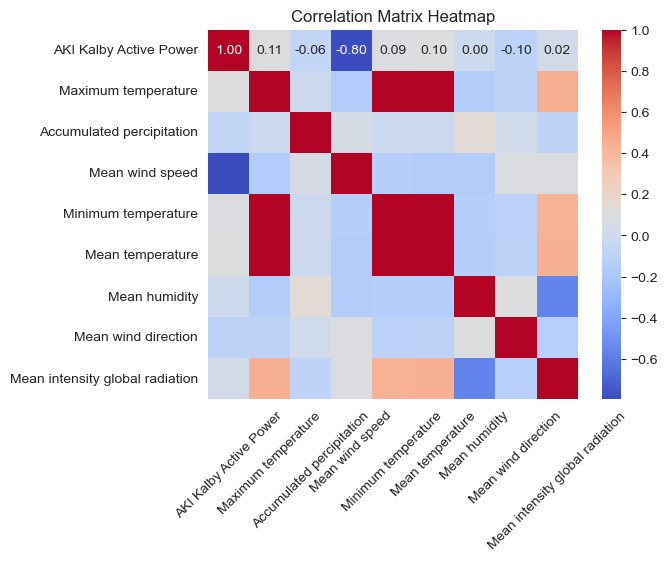

In [24]:
# columns_of_interest = [
#     'AKI Kalby Active Power',
#     'Maximum temperature',
#     'Accumulated percipitation',
#     'Mean wind speed',
#     'Minimum temperature',
#     'Mean temperature',
#     'Mean humidity',
#     'Mean wind direction',
#     'Mean intensity global radiation'
# ]
# 
# # Selecting only the columns of interest
# selected_data = merged_df[columns_of_interest]

# Compute the correlation matrix
correlation_matrix = merged_df.corr()

# Set up the matplotlib figure
plt.figure()

# Draw the heatmap
sns.heatmap(merged_df.corr(), cmap='coolwarm', square=True, fmt=".2f", annot=True)

# Title and labels
plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Show the plot
plt.show()

In [25]:
merged_df.corr()

,AKI Kalby Active Power,Maximum temperature,Accumulated percipitation,Mean wind speed,Minimum temperature,Mean temperature,Mean humidity,Mean wind direction,Mean intensity global radiation
AKI Kalby Active Power,1.000000,0.106181,-0.063650,-0.797750,0.086575,0.096825,0.000850,-0.098898,0.021909
Maximum temperature,0.106181,1.000000,-0.013389,-0.156930,0.995600,0.998792,-0.146188,-0.093723,0.451271
Accumulated percipitation,-0.063650,-0.013389,1.000000,0.049439,-0.014971,-0.014896,0.142634,0.016643,-0.082173
Mean wind speed,-0.797750,-0.156930,0.049439,1.000000,-0.132433,-0.145227,-0.145199,0.081013,0.086533
Minimum temperature,0.086575,0.995600,-0.014971,-0.132433,1.000000,0.998711,-0.133942,-0.104639,0.435024
Mean temperature,0.096825,0.998792,-0.014896,-0.145227,0.998711,1.000000,-0.140678,-0.098577,0.443344
Mean humidity,0.000850,-0.146188,0.142634,-0.145199,-0.133942,-0.140678,1.000000,0.094004,-0.561869
Mean wind direction,-0.098898,-0.093723,0.016643,0.081013,-0.104639,-0.098577,0.094004,1.000000,-0.130412
Mean intensity global radiation,0.021909,0.451271,-0.082173,0.086533,0.435024,0.443344,-0.561869,-0.130412,1.000000


With a correlation of -0.6, mean wind spead has a strong negative correlation with power production. This indicates that wind speed has a strong influence on power production, and it is likely a crucial feature.
The temperature features may not contribute significantly to your prediction model, but can have secondary effects on power production (e.g., affecting air density or turbine efficiency). For completeness and because it is the variable with the third highest correlation we decided to keep maximimum temperature but treat them with lower priority.
 Despite the high variance, the low correlation with power production suggests that wind direction doesn't strongly impact power output. However, it still has the second highest correlation of the features, which is why we decide to take it into account anyway. 

In [26]:
feature_df=merged_df[['AKI Kalby Active Power', 'Maximum temperature', 'Mean wind direction', 'Mean wind speed']]

In [29]:
# feature_df.to_csv('../Data assignment 1/Feature data.csv', index=True)  
output_path = r"C:\Users\ilsed\OneDrive\Documents\EPA\Jaar 2\DTU\machine learning for energy systems\Feature data.csv"

# Save the DataFrame as a CSV file
feature_df.to_csv(output_path, index=True)   